In [1]:
# Imports modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [2]:
# Creates a DataFrame from the stroke dataset 
df = pd.read_csv("C:\\Users\\cmgro\\Downloads\\archive\\healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Encodes categorical data from the DataFrame
df['gender'] = df['gender'].astype('category')
df['work_type'] = df['work_type'].astype('category')
df['Residence_type'] = df['Residence_type'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')
df['ever_married'] = df['ever_married'].astype('category')

df['gender_cat'] = df['gender'].cat.codes
df['work_type_cat'] = df['work_type'].cat.codes
df['Residence_type_cat'] = df['Residence_type'].cat.codes
df['smoking_status_cat'] = df['smoking_status'].cat.codes
df['ever_married'] = df['ever_married'].cat.codes

In [4]:
# Replaces NaN value in the 'bmi' column with 0
df = df.replace(np.nan, 0, regex=True)
df['bmi'] = df['bmi'].astype(int)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_cat,work_type_cat,Residence_type_cat,smoking_status_cat
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36,formerly smoked,1,1,2,1,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,0,never smoked,1,0,3,0,2
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32,never smoked,1,1,2,0,2
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34,smokes,1,0,2,1,3
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24,never smoked,1,0,3,0,2


C:\Users\cmgro\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='age', ylabel='id'>,
        <AxesSubplot:xlabel='hypertension', ylabel='id'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='id'>,
        <AxesSubplot:xlabel='ever_married', ylabel='id'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='id'>,
        <AxesSubplot:xlabel='bmi', ylabel='id'>,
        <AxesSubplot:xlabel='stroke', ylabel='id'>,
        <AxesSubplot:xlabel='gender_cat', ylabel='id'>,
        <AxesSubplot:xlabel='work_type_cat', ylabel='id'>,
        <AxesSubplot:xlabel='Residence_type_cat', ylabel='id'>,
        <AxesSubplot:xlabel='smoking_status_cat', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='hypertension', ylabel='age'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='age'>,
        <AxesSubplot:xlabel='ever_married', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_le

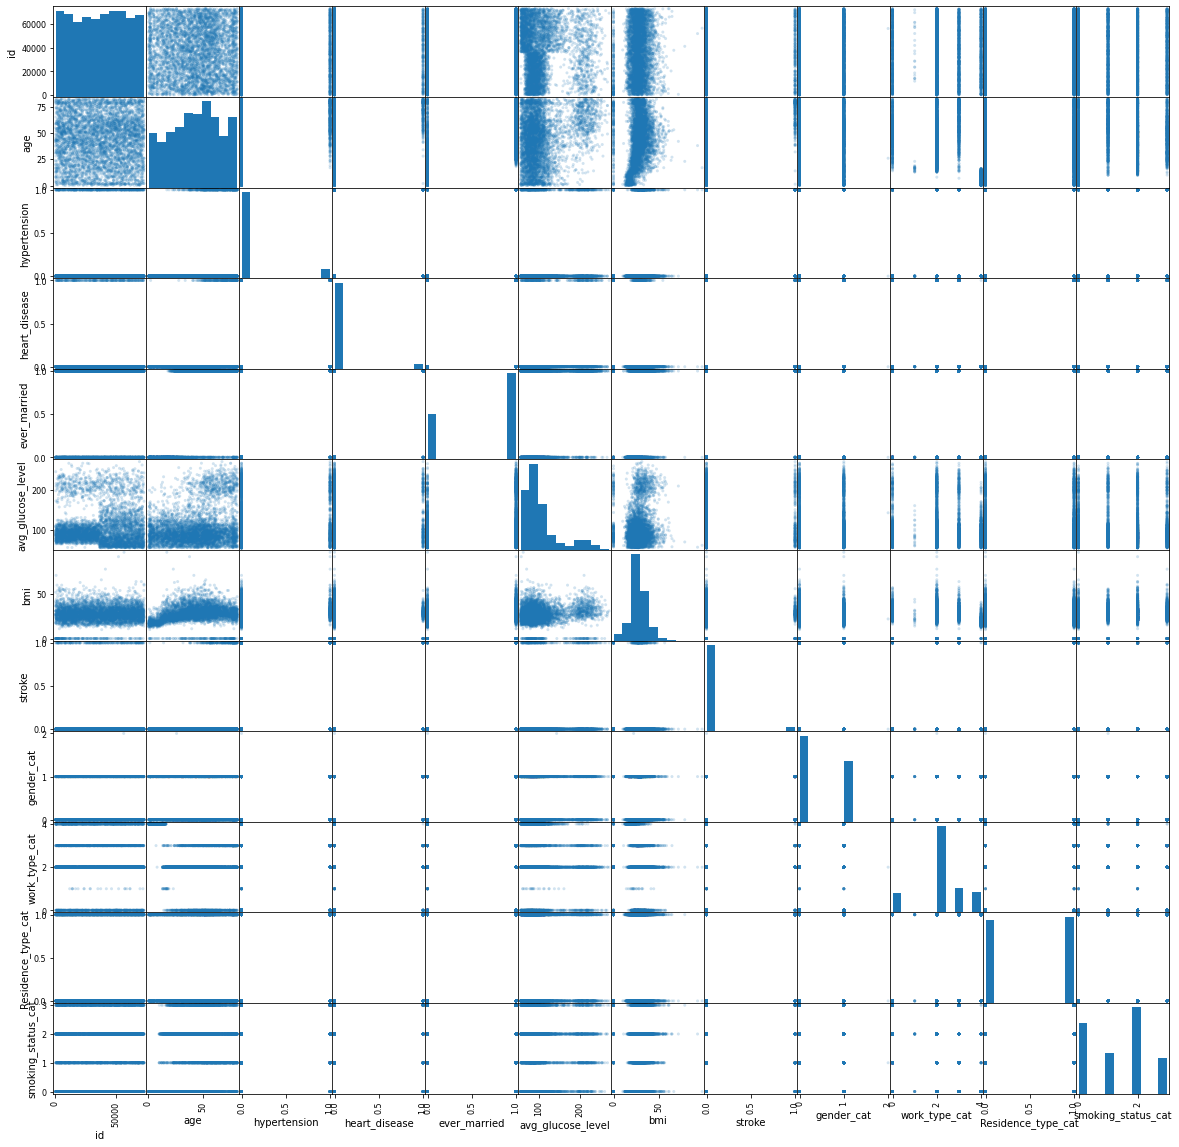

In [5]:
# Plots scatter matrix using columns from the DataFrame
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))

In [6]:
# Assigns columns from the DataFrame to variables X and y
X = df.drop(columns=['id', 'stroke', 'Residence_type', 'ever_married', 'gender', 'work_type', 'smoking_status'])
y = df.stroke

# Splits the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Creates a logistic regression model from variables X and y
model = Pipeline([
    ('logistic', LogisticRegression(class_weight="balanced", solver='liblinear'))
    ])
model.fit(X_train, y_train)

# Adjusts the probability threshold for classification
THRESHOLD = 0.75
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [7]:
# Prints the R^2 value of the model using the training and test data
print(f'Model score on training data: {model.score(X_train,y_train)}')
print(f'Model score on testing data: {model.score(X_test,y_test)}')

Model score on training data: 0.7505112474437627
Model score on testing data: 0.7457024303497333


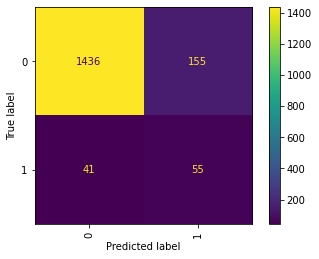

In [8]:
# Prints a confusion matrix for the model 
cm = confusion_matrix(y_test, preds) # Plot the confusion matrix
display_labels = 1
cm_display = ConfusionMatrixDisplay(cm).plot(xticks_rotation='vertical')